In [15]:
#from IPython.external import mathjax; mathjax.install_mathjax()
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import healpy.projector as pro
import astropy.io.fits as fits
from scipy.stats import gaussian_kde
import scipy
import pandas as pd
import pickle
matplotlib.style.use('seaborn-bright')
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import seaborn as sb

# Outline:
### Introduction:
  * What is anomalous microwave emission? (AME)
  * Why is AKARI useful?

### Our approach:
  * Compare Planck AME map with IR maps
  * Can we say more than "AME Correlates with dust"

### Results:
  * All-sky comparison - AME vs. IRC
  * $\lambda$ Orionis - 

### Discussion:
  * Can we rule out spinning dust?
  * What about effect of uncertainties on the correlation?
  * Do we need better AME data?

### Future (ongoing)) work:
  * Dust SED fittin (with help from Galliano-sensei)
  Tangential work:
  * Explore all-sky data with machine learning methods

In [ ]:
# Intro: What is Anomalous Microwave Emisison (?!)

# The microwave sky contains many components  
### Mainly:
1. Cosmic microwave background  
2. Galactic foreground emission:

![alt text](https://lambda.gsfc.nasa.gov/product/foreground/fg_images/Planck_A12_Fig24_left.png "Galactic Microwave Foreground SED")

###### From "Planck 2015 results. X. Diffuse component separation: Foreground maps":
`https://arxiv.org/abs/1502.01588`

> * Anomalous: inconsistent with or deviating from what is usual, normal, or expected. 

# Intro: Microwave All-sky Data

> "There is no 'CMB Observation', only microwave and radio observations.  " 

In [9]:
lfi30ghz = hp.read_map('../../../Python/Projects/PlanckPCA/data/planck/LFI_SkyMap_030-BPassCorrected_0256_R2.01_full.fits')

NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


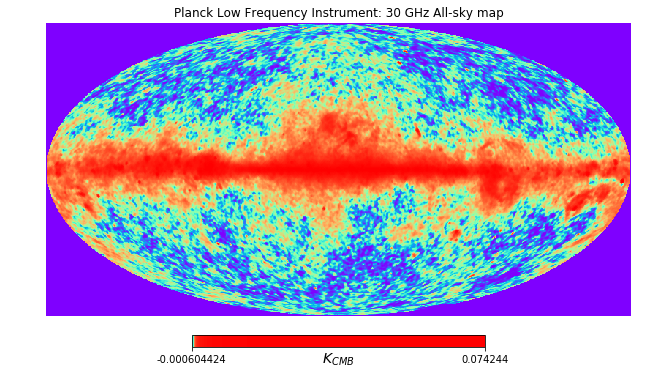

In [10]:

hp.mollview(lfi30ghz,
           title = 'Planck Low Frequency Instrument: 30 GHz All-sky map',
           norm = 'hist',
           cmap = 'rainbow',
           unit = '$K_{CMB}$')

# Our approach:
  * Compare AKARI, Planck, and IRAS maps to the AME
    * Major caveats:
        * Limited to ~1-degree resolution
        * No "ground truth" AME map !!
  * All-sky comparison
  * Localized inspection of $\lambda$ Orionis

### Intro: Why AKARI?

  * IRC 9 $\mu{}m$ allows ionized PAH feature coverage


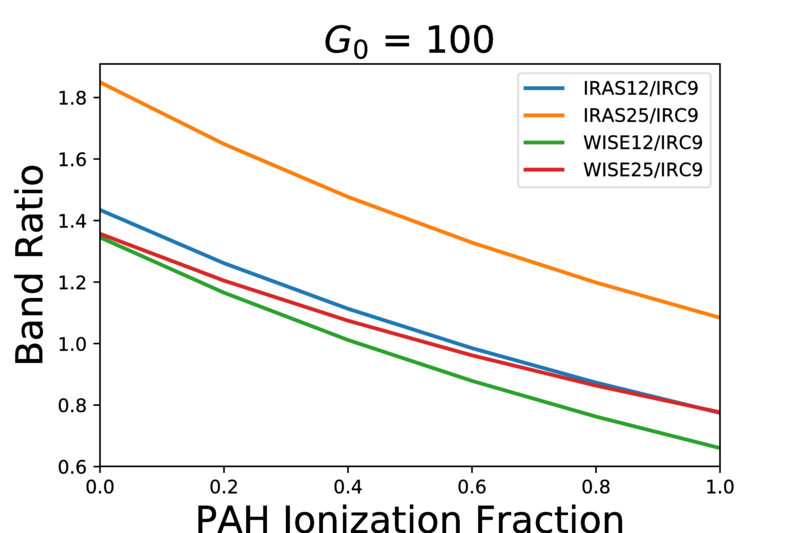
  * $G_{0}$ indicates the interstellar radiation field relative to the solar neighborhood

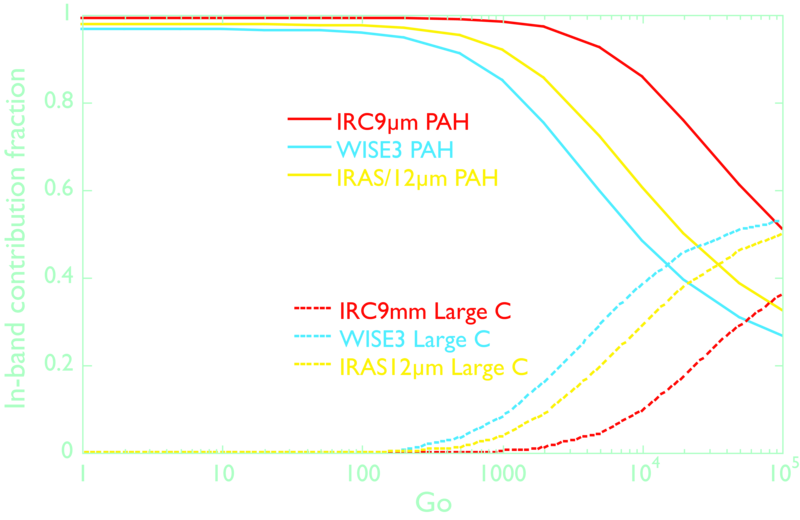

# Results: All-sky comparison

#### 2D Kernel Density plots: Each IR band's intensity vs. AME
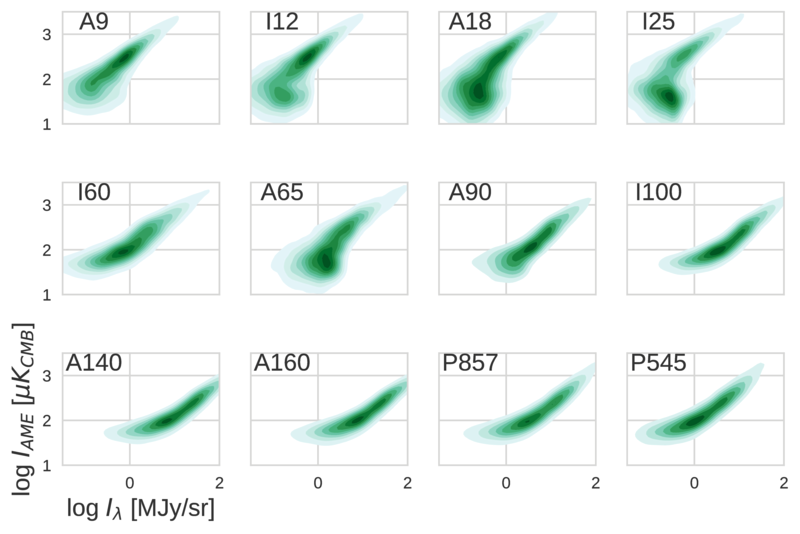
  *

#### What if scale by the radiation field strength ($U$)?


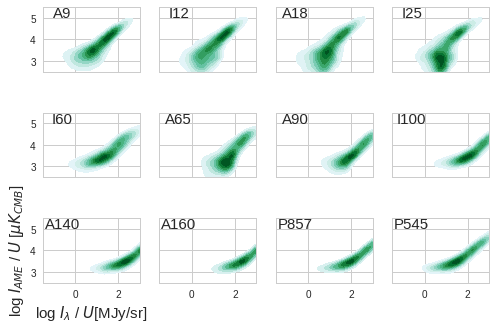

  * $U$ is approximated as the dust radiance $R$ divided by the optical depth $\tau_{353 GHz}$
  * $R$ and $\tau_{353 GHz}$ are from the Planck PR1 thermal dust parameter maps

### Spearman Correlation Matrix: IR Bands' Intensity and AME


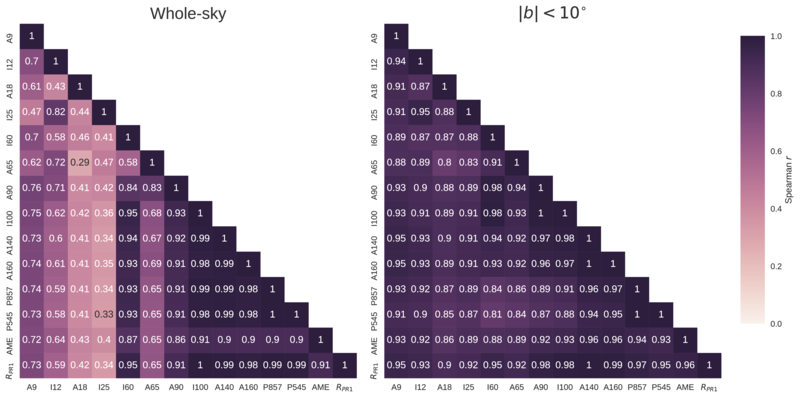

### Spearman Correlation Matrix: IR Bands' Intensity and AME
##### Scale by $U$

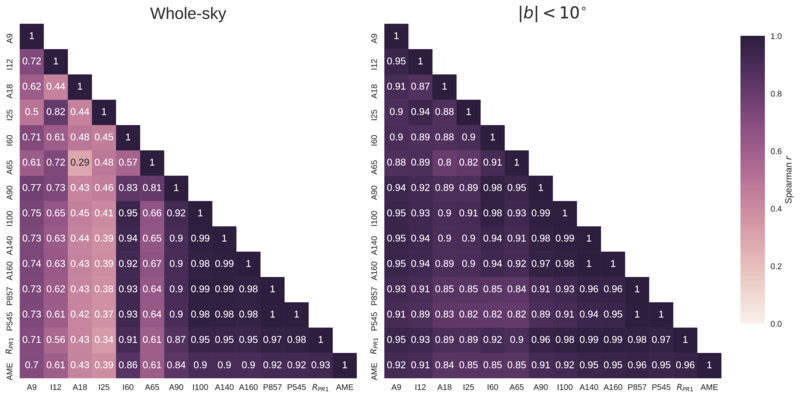

# Results: What about ionization fraction?

In [ ]:
# Results: All-sky Correlation maps


# Results: $\lambda$  Orionis

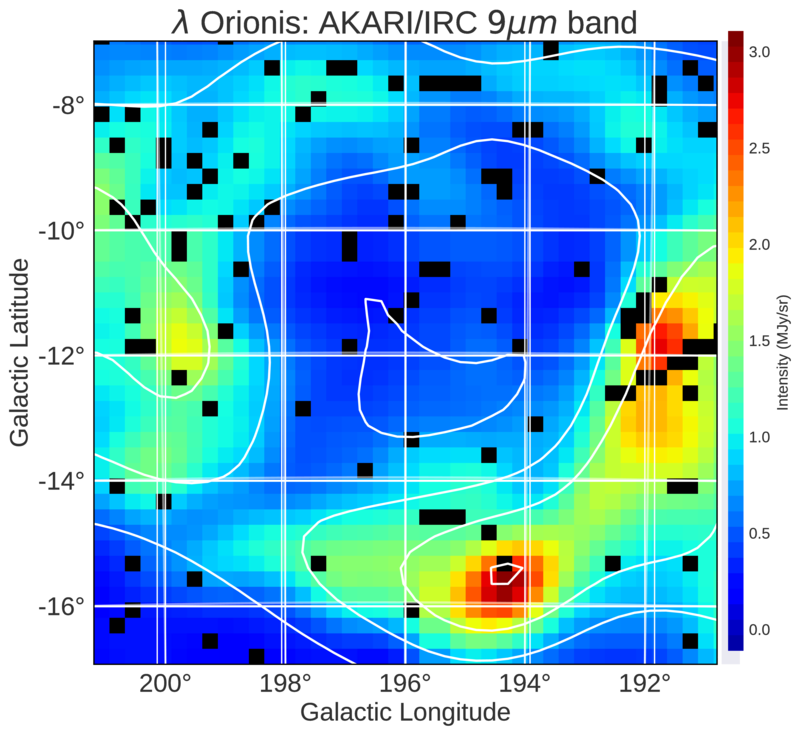

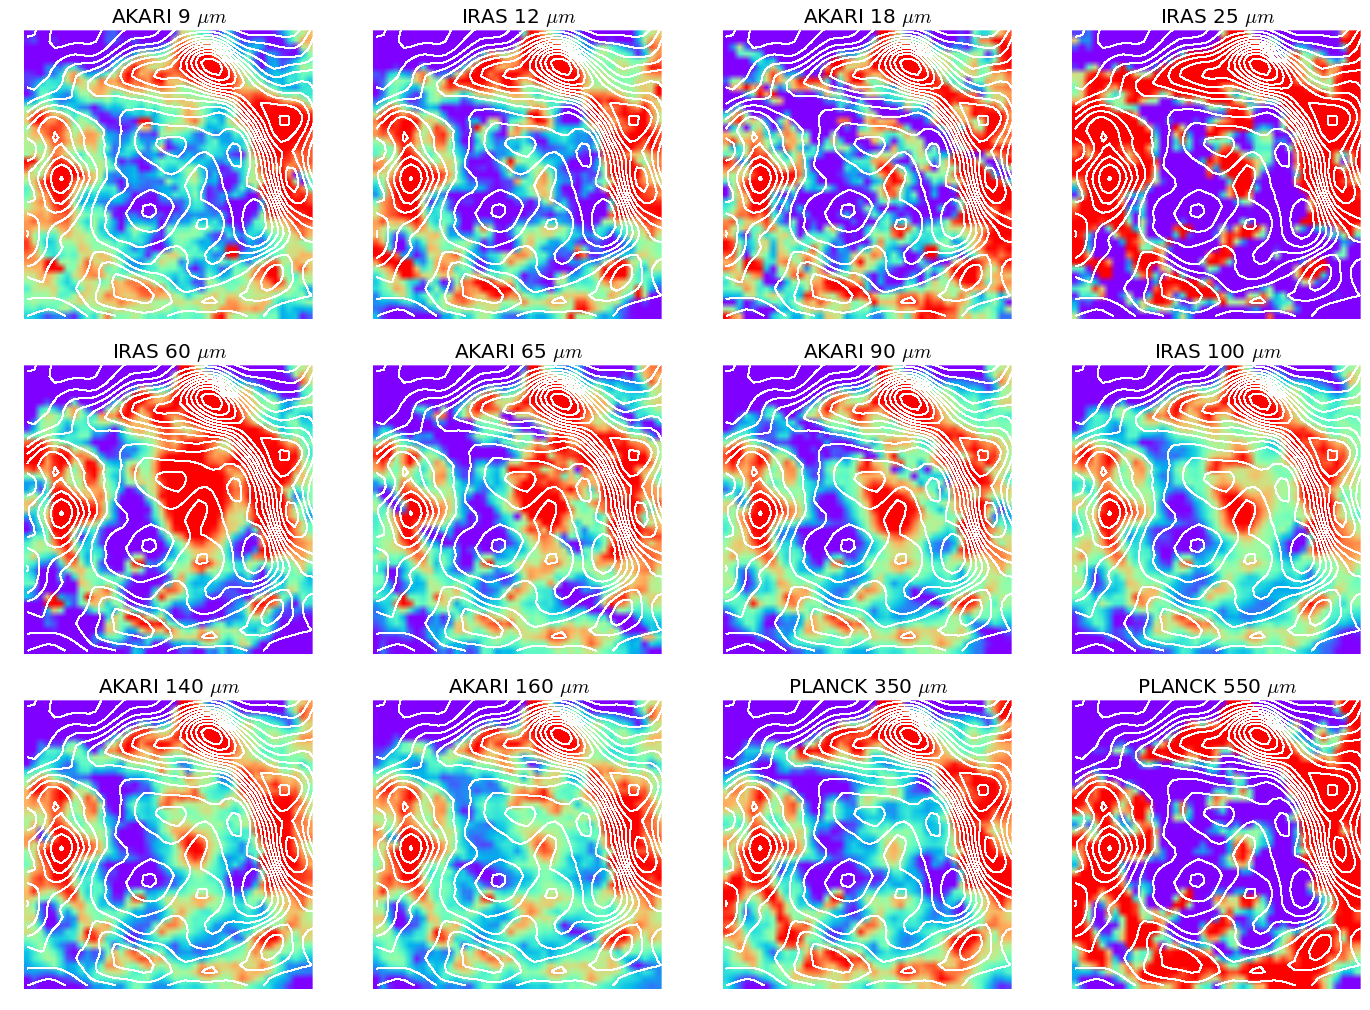

In [2]:
def testSpatialCorr(df, 
                    nside_in, 
                    nside_out,
                    method='spearman'):
    
    npix_in    = 12*nside_in**2
    npix_out   = 12*nside_out**2
    pix_interv = (nside_in/nside_out)**2
    
    ## First, do it the "normal way"-
    patches_corr = [df.iloc[i*pix_interv:(i+1)*pix_interv].corr(method=method) for i in range(0,npix_out)]
    corr_patches_pn = pd.Panel({i: patches_corr[i] for i in range(0,npix_out)})

    
    return corr_patches_pn

def displaySpatialCorr(corr_patches_pn,labels, ref_col=0,subdir='../Plots/Allsky_Corr/'):

    nside = len(corr_patches_pn.values[:,0,0])
    #fig = plt.figure(figsize=(8,4))

    for j in range(0,len(labels)):
        #plt.subplot(2,5,(j*2)+1)
        hp.mollview(corr_patches_pn.values[:,j,ref_col],
                         #sub=(1,4,j+1), 
                         #fig=fig,
                         cmap = "rainbow", 
                         cbar = False, 
                         min  = -1, 
                         max  = 1, 
                         nest = True, 
                         title="$S$({}:{}) NSIDE".format(labels[ref_col],labels[j],nside_out))
        hp.graticule(dpar=5, dmer=5,coord='G')
        
        plt.savefig("{}/Spearman_Map_nside{}_{}to{}.pdf".format(subdir,nside_out,labels[ref_col],labels[j]) )